In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import random
import numpy as np
import matplotlib.pyplot as plt

In [30]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


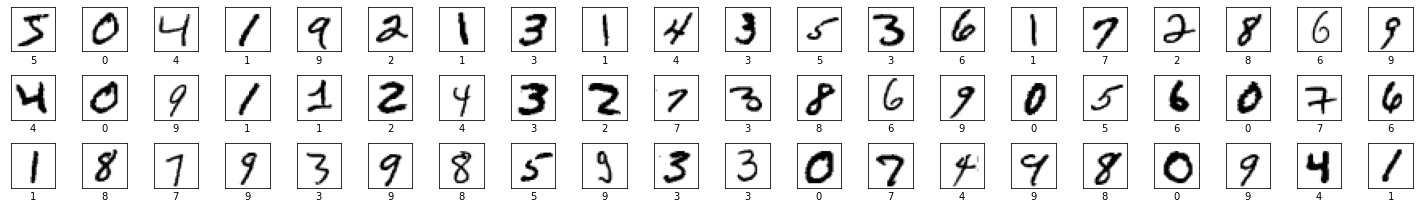

In [31]:
R = 3
C = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(R):
    for c in range(C):
        plt.subplot(R, C, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show()

In [32]:
x_train = x_train.reshape(-1, 28,28,1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28,28,1).astype("float32") / 255.0

In [33]:
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    
    
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'), 
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
  
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [34]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [35]:
h = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 17s 22ms/step - loss: 0.1933 - accuracy: 0.9408 - val_loss: 0.0651 - val_accuracy: 0.9806
Epoch 2/5
750/750 [==============================] - 17s 22ms/step - loss: 0.0560 - accuracy: 0.9832 - val_loss: 0.0449 - val_accuracy: 0.9887
Epoch 3/5
750/750 [==============================] - 16s 22ms/step - loss: 0.0397 - accuracy: 0.9876 - val_loss: 0.0407 - val_accuracy: 0.9874
Epoch 4/5
750/750 [==============================] - 16s 22ms/step - loss: 0.0284 - accuracy: 0.9911 - val_loss: 0.0411 - val_accuracy: 0.9884
Epoch 5/5
750/750 [==============================] - 17s 22ms/step - loss: 0.0242 - accuracy: 0.9922 - val_loss: 0.0417 - val_accuracy: 0.9876


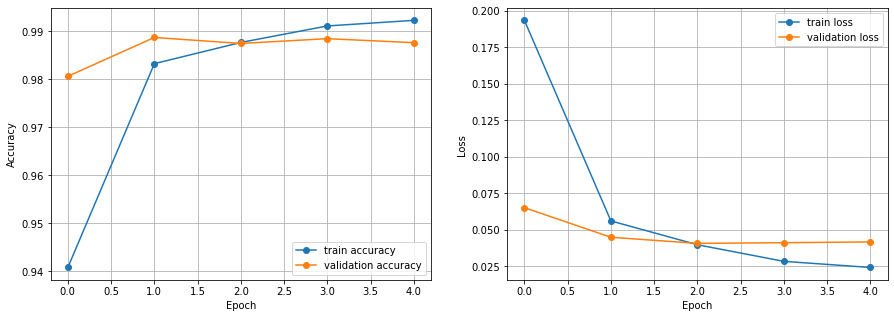

In [36]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [37]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('\nTest Accuracy:', test_acc)

print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.0336 - accuracy: 0.9878

Test Accuracy: 0.9878000020980835

Test Loss: 0.033636339008808136


In [38]:
model.compile(
     optimizer='rmsprop', 
     loss='sparse_categorical_crossentropy', 
     metrics=['accuracy']
 )

In [39]:
h = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 17s 22ms/step - loss: 0.0196 - accuracy: 0.9935 - val_loss: 0.0366 - val_accuracy: 0.9912
Epoch 2/5
750/750 [==============================] - 16s 22ms/step - loss: 0.0156 - accuracy: 0.9954 - val_loss: 0.0440 - val_accuracy: 0.9892
Epoch 3/5
750/750 [==============================] - 17s 22ms/step - loss: 0.0127 - accuracy: 0.9958 - val_loss: 0.0377 - val_accuracy: 0.9918
Epoch 4/5
750/750 [==============================] - 17s 23ms/step - loss: 0.0109 - accuracy: 0.9965 - val_loss: 0.0513 - val_accuracy: 0.9904
Epoch 5/5
750/750 [==============================] - 18s 24ms/step - loss: 0.0088 - accuracy: 0.9974 - val_loss: 0.0473 - val_accuracy: 0.9900


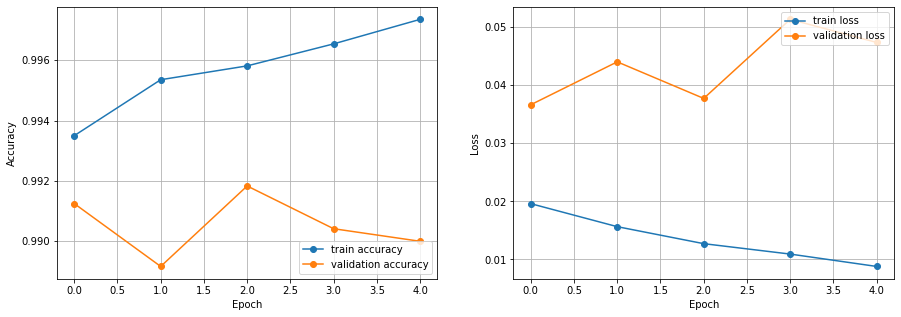

In [40]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [41]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('\nTest Accuracy:', test_acc)

print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.0326 - accuracy: 0.9921

Test Accuracy: 0.9921000003814697

Test Loss: 0.03261703625321388


In [42]:
model.compile(
    optimizer='sgd', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
 )

In [43]:
h = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 16s 21ms/step - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.0410 - val_accuracy: 0.9918
Epoch 2/5
750/750 [==============================] - 16s 22ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0408 - val_accuracy: 0.9919
Epoch 3/5
750/750 [==============================] - 16s 22ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0405 - val_accuracy: 0.9920
Epoch 4/5
750/750 [==============================] - 16s 22ms/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.0405 - val_accuracy: 0.9923
Epoch 5/5
750/750 [==============================] - 17s 22ms/step - loss: 0.0017 - accuracy: 0.9997 - val_loss: 0.0401 - val_accuracy: 0.9922


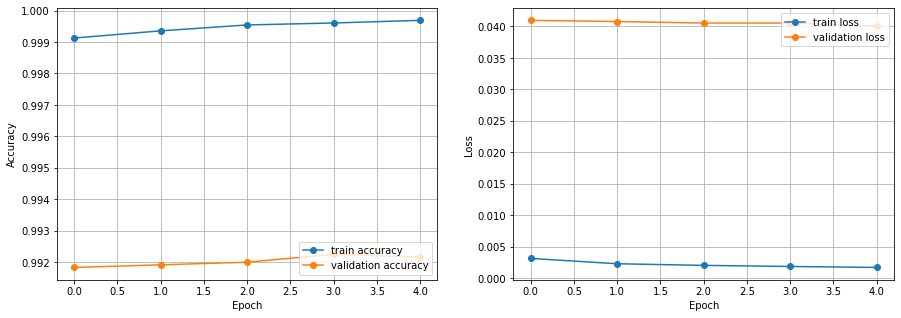

In [44]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [45]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('\nTest Accuracy:', test_acc)

print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.0258 - accuracy: 0.9931

Test Accuracy: 0.9930999875068665

Test Loss: 0.025768661871552467
